In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [44]:
df = pd.read_csv('data/bank-additional-full.csv', delimiter=';', na_values=['unknown'])
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [41]:
df['target'] = df.apply(lambda row: 1 if row['y'] == 'yes' else 0, axis=1)
df.drop(['y'],axis=1,inplace=True)

In [42]:
def boxplot(attribute):
    values = df[attribute]
    mean=np.array(values).mean()
    median=np.median(values)

    f, (ax_box, ax_hist) = plt.subplots(2, sharex='col', gridspec_kw= {'height_ratios': (0.5, 2)})

    sns.boxplot(values, ax=ax_box)
    ax_box.axvline(mean, color='r', linestyle='--')
    ax_box.axvline(median, color='g', linestyle='-')
    ax_box.set(xlabel='')

    sns.distplot(values, ax=ax_hist)
    ax_hist.axvline(mean, color='r', linestyle='--')
    ax_hist.axvline(median, color='g', linestyle='-')
    plt.legend({'Mean':mean,'Median':median})
    plt.show()

age


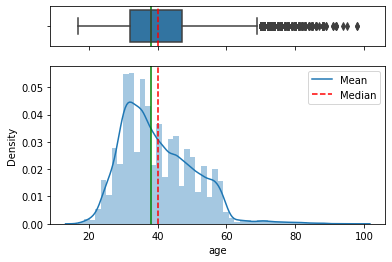

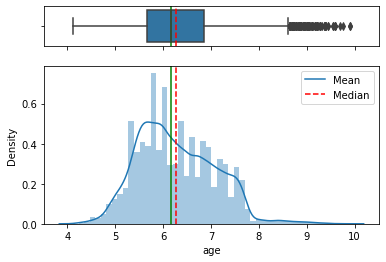

duration


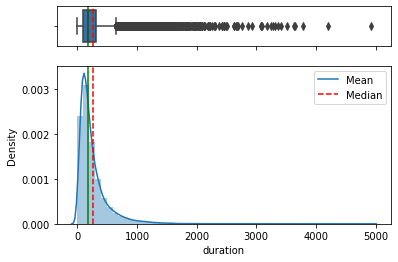

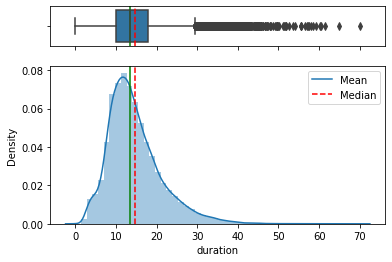

previous


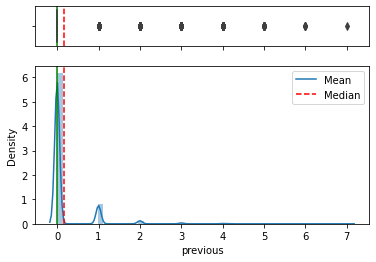

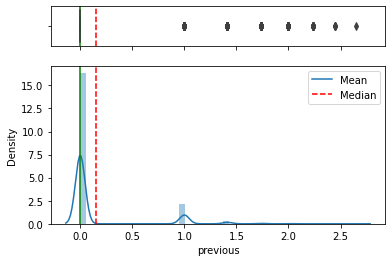

campaign


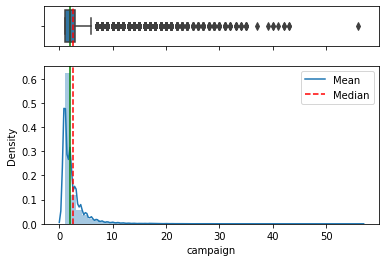

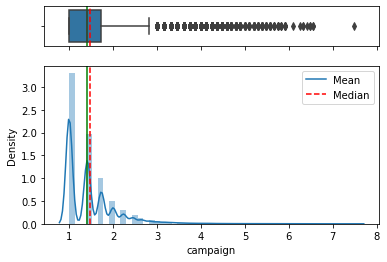

pdays


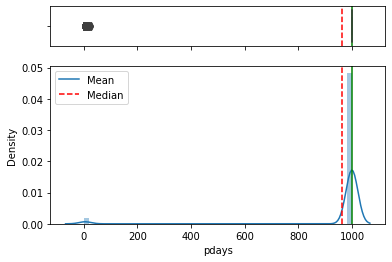

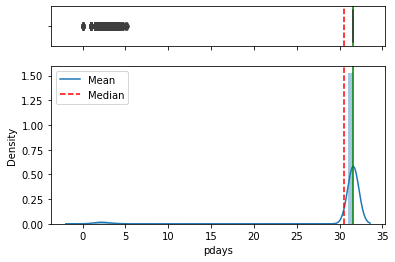

cons.conf.idx


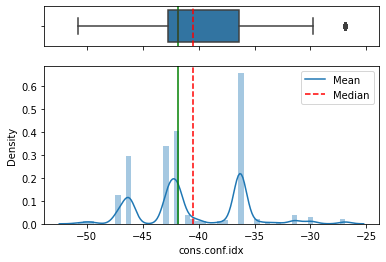

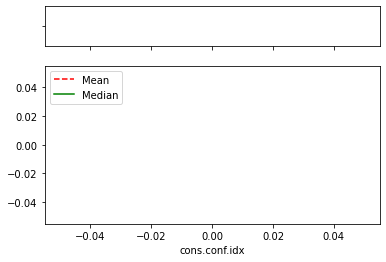

In [45]:
outliers = ['age', 'duration', 'previous', 'campaign', 'pdays', 'cons.conf.idx']
for out in outliers:
    print(out)
    boxplot(out)
    df[out] = np.sqrt(df[out])
    boxplot(out)

[Text(0, 0, 'basic.4y'),
 Text(1, 0, 'high.school'),
 Text(2, 0, 'basic.6y'),
 Text(3, 0, 'basic.9y'),
 Text(4, 0, 'professional.course'),
 Text(5, 0, 'university.degree'),
 Text(6, 0, 'illiterate')]

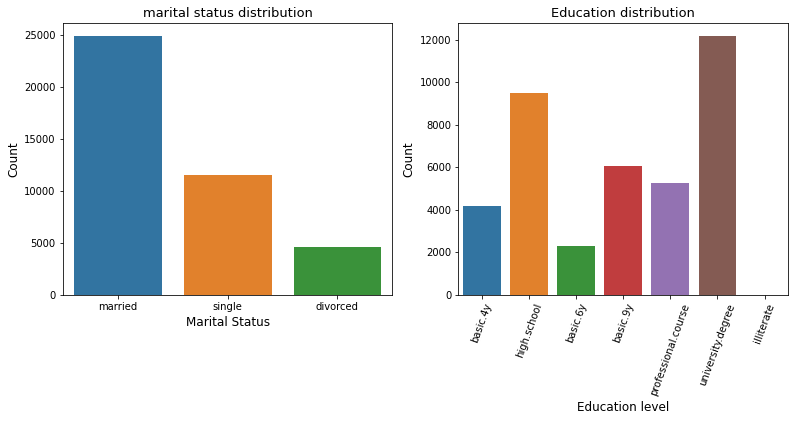

In [7]:
_, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))

# First plot for marital status
sns.countplot(x='marital', data=df, ax=ax1)
ax1.set_title('Marital status distribution', fontsize=13)
ax1.set_xlabel('Marital Status', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)

# Second plot for Education distribution
sns.countplot(x='education', data=df, ax=ax2)
ax2.set_title('Education distribution', fontsize=13)
ax2.set_xlabel('Education level', fontsize=12)
ax2.set_ylabel('Count', fontsize=12)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=70)

Text(0.5, 1.0, 'Job Count Distribution')

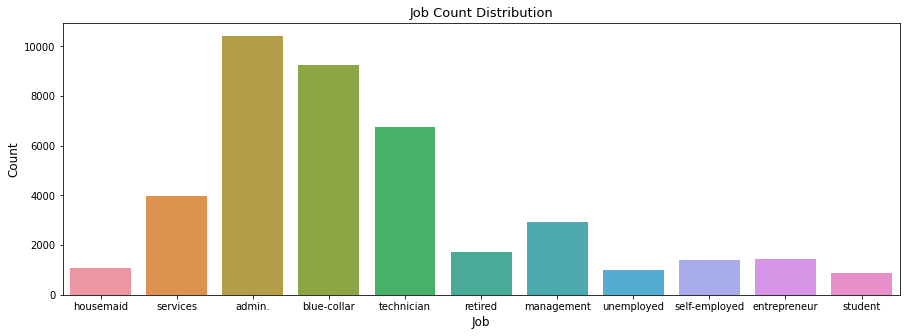

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(15,5)
sns.countplot(x='job', data=df)
ax.set_xlabel('Job', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Job Count Distribution', fontsize=13)

In [30]:
na_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'housing']
for column in ['default']:
    df['job'].value_counts()
    print(df[column].mode()[0])
    df[column].fillna(df[column].mode()[0], inplace=True)

no


In [31]:
df.isnull().sum()

age                  0
job                330
marital             80
education         1731
default              0
housing              0
loan                 0
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
target               0
dtype: int64

In [29]:
df['default'].value_counts()

no     32588
yes        3
Name: default, dtype: int64

In [34]:
from sklearn.cluster import KMeans

clf = KMeans(n_clusters=11)

train = df[pd.notna(df['education'])]
test = df[pd.isna(df['education'])]
train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [35]:
test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
7,41,blue-collar,married,NaN,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
10,41,blue-collar,married,NaN,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
26,59,technician,married,NaN,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
30,46,admin.,married,NaN,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
31,59,technician,married,NaN,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
